In [11]:
# run this code when you are working on the  CATS and DOGS only
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the cats vs. dogs dataset
dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)


**Displaying the Original Images**

Image: (262, 350, 3)
Label: 1
Original



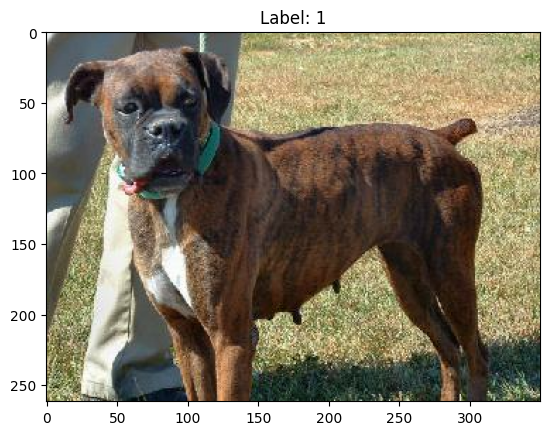

Image: (409, 336, 3)
Label: 1
Original



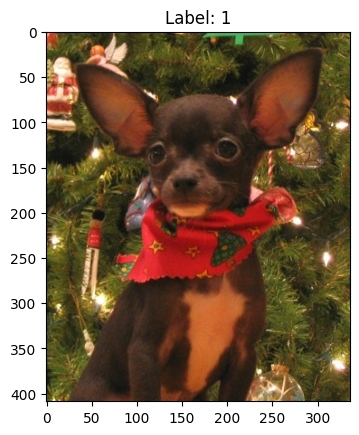

Image: (493, 500, 3)
Label: 1
Original



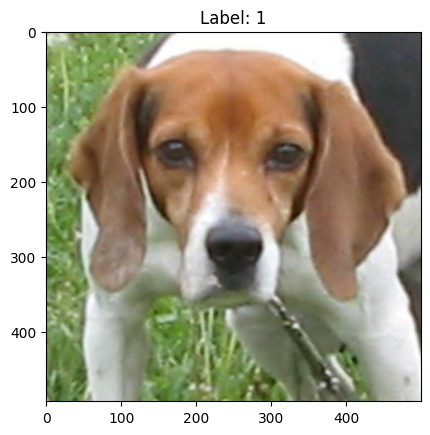

Image: (375, 500, 3)
Label: 0
Original



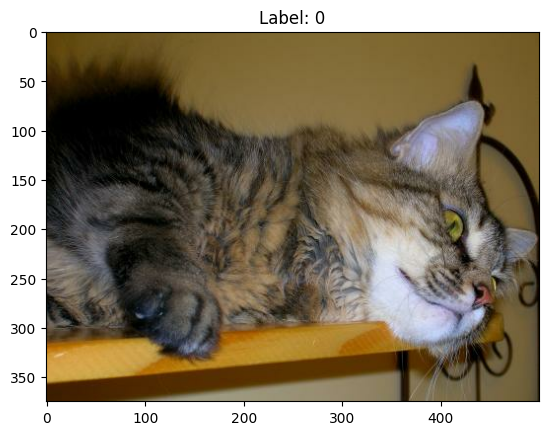

Image: (240, 320, 3)
Label: 1
Original



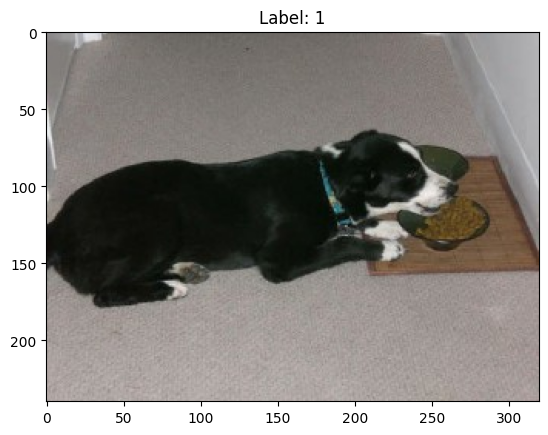

In [12]:
import numpy as np
import matplotlib.pyplot as plt

count = 0
for example in dataset.as_numpy_iterator():
    image = example['image']
    label = example['label']
    print(f"Image: {image.shape}")
    print(f"Label: {label}")

    # Display the image
    print("Original")
    print("")
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.show()

    count += 1
    if count == 5:
        break



**Displaying the Augmented Images**

Image: (262, 350, 3)
Label: 1
Augmented



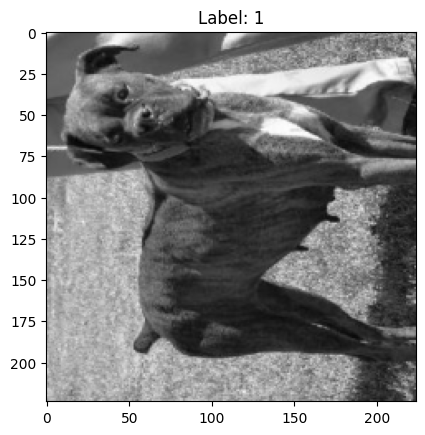

Image: (409, 336, 3)
Label: 1
Augmented



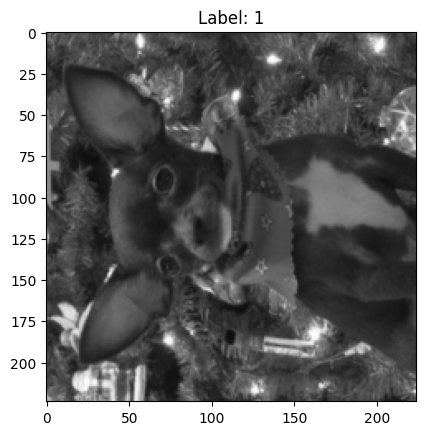

Image: (493, 500, 3)
Label: 1
Augmented



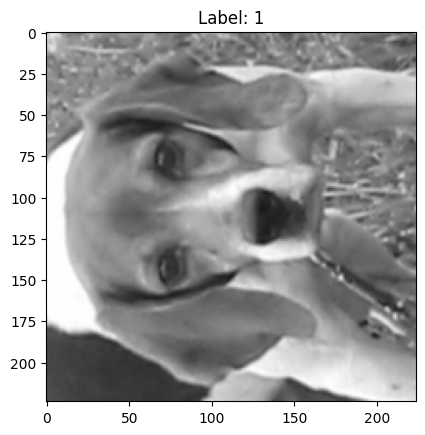

Image: (375, 500, 3)
Label: 0
Augmented



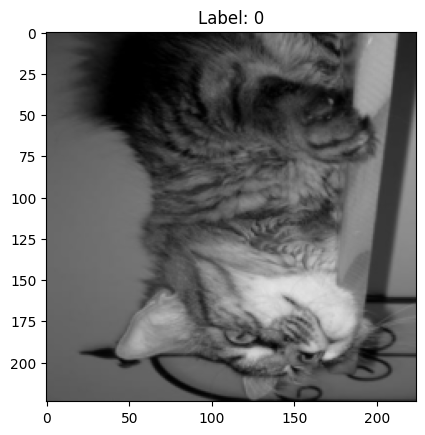

Image: (240, 320, 3)
Label: 1
Augmented



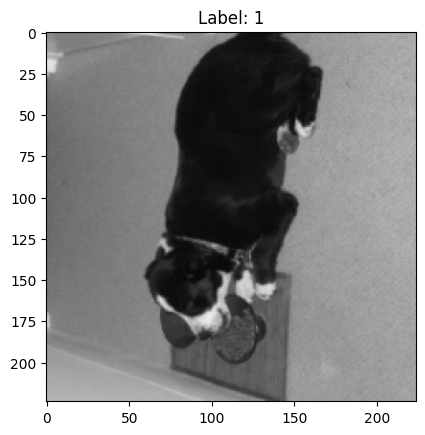

In [13]:
count = 0
for example in dataset.as_numpy_iterator():
    image = example['image']
    label = example['label']
    print(f"Image: {image.shape}")
    print(f"Label: {label}")

    # Display the image
    print("Augmented")
    print("")
    image = tf.image.resize(image,[224,224],antialias=True)
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.transpose(image)
    image = tf.image.random_brightness(image, 0.7)
    image = tf.image.grayscale_to_rgb(image)
    image = tf.image.adjust_saturation(image, 0.3)
    image = tf.cast(image,tf.float32)
    image = image/255.0
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.show()
    count += 1
    if count == 5:
        break

# Preprocessing function

The preprocess_image function is for without the augmentation and the preprocess_image_with_augmentation function is for with augmentation.

In [14]:
# Define a function to preprocess images (e.g., resize and normalize)
def preprocess_image(element): #without the augmentation for RGB
    image = element["image"]
    label = element["label"]
    # Add your code here (below)
    image = tf.image.resize(image,[224,224],antialias=True)
    image = image/255.0
    return image, label

def preprocess_image_grayscale(element): #for grayscale
    image = element["image"]
    label = element["label"]
    # Add your code here (below)
    image = tf.image.resize(image,[224,224],antialias=True)
    image = tf.image.rgb_to_grayscale(image)
    image = image/255.0
    return image, label

def preprocess_image_with_augmentation(element): #with the augmentation for RGB
    image = element["image"]
    label = element["label"]

    # Add your code here (below)
    image = tf.image.resize(image,[224,224],antialias=True)
    image = tf.image.rgb_to_grayscale(image) # First method to convert rgb to grayscale
    image = tf.image.random_flip_left_right(image) # Second method to randomly flip the image
    image = tf.image.transpose(image) # Third method to transpose the image
    image = tf.image.random_brightness(image, 0.7) # Fourth method to set a brightness
    image = tf.image.grayscale_to_rgb(image) # Fifth method to convert grayscale to rgb
    image = tf.image.adjust_saturation(image, 0.3) # Sixth method to adjust the saturation of rgb images
    image = tf.cast(image,tf.float32) # Seventh method to casts tensor to float datatype
    image = image/255.0 # For normalizing
    return image, label


Model for RGB

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Apply preprocessing to the dataset
batch_size = 32
dataset1 = dataset.map(preprocess_image)#without the augmentation
dataset2 = dataset.map(preprocess_image_with_augmentation)#with the augmentation
dataset1 = dataset1.batch(batch_size)
dataset2 = dataset2.batch(batch_size)

def create_model():
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        # Flatten the output and add fully connected layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create an instance of the model
model = create_model()

# Train the model
print("Accuracy and Loss without the Augmentation for RGB Images")
print("")
history1 = model.fit(dataset1, epochs=7)  # You can specify the number of epochs you want to train for
print("")
print("Accuracy and Loss with the Augmentation for RGB Images")
print("")
history2 = model.fit(dataset2, epochs=7)



Accuracy and Loss without the Augmentation for RGB Images

Epoch 1/7
727/727 [==============================] - 82s 110ms/step - loss: 0.6550 - accuracy: 0.5995
Epoch 2/7
727/727 [==============================] - 82s 113ms/step - loss: 0.5176 - accuracy: 0.7430
Epoch 3/7
727/727 [==============================] - 80s 110ms/step - loss: 0.4093 - accuracy: 0.8112
Epoch 4/7
727/727 [==============================] - 82s 112ms/step - loss: 0.3199 - accuracy: 0.8589
Epoch 5/7
727/727 [==============================] - 81s 112ms/step - loss: 0.2278 - accuracy: 0.9073
Epoch 6/7
727/727 [==============================] - 80s 110ms/step - loss: 0.1655 - accuracy: 0.9349
Epoch 7/7
727/727 [==============================] - 82s 113ms/step - loss: 0.1215 - accuracy: 0.9543

Accuracy and Loss with the Augmentation for RGB Images

Epoch 1/7
727/727 [==============================] - 128s 176ms/step - loss: 0.4889 - accuracy: 0.7676
Epoch 2/7
727/727 [==============================] - 128s 176ms/ste

Model for Grayscale

In [16]:
dataset3 = dataset.map(preprocess_image_grayscale)
dataset3 = dataset3.batch(batch_size)
def create_model_grayscale():
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        # Flatten the output and add fully connected layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create an instance of the model
model = create_model_grayscale()
print("Grayscale Accuracy and Loss")
print("")
history3 = model.fit(dataset3, epochs=7)


Grayscale Accuracy and Loss

Epoch 1/7
727/727 [==============================] - 95s 128ms/step - loss: 0.6461 - accuracy: 0.6155
Epoch 2/7
727/727 [==============================] - 94s 129ms/step - loss: 0.5052 - accuracy: 0.7532
Epoch 3/7
727/727 [==============================] - 93s 127ms/step - loss: 0.3878 - accuracy: 0.8227
Epoch 4/7
727/727 [==============================] - 94s 129ms/step - loss: 0.2847 - accuracy: 0.8773
Epoch 5/7
727/727 [==============================] - 94s 129ms/step - loss: 0.1913 - accuracy: 0.9223
Epoch 6/7
727/727 [==============================] - 94s 129ms/step - loss: 0.1276 - accuracy: 0.9507
Epoch 7/7
727/727 [==============================] - 95s 131ms/step - loss: 0.0861 - accuracy: 0.9682


# **This graph displays the loss and accuracy of the model done without the augmentation.**

In [17]:
import pandas as pd

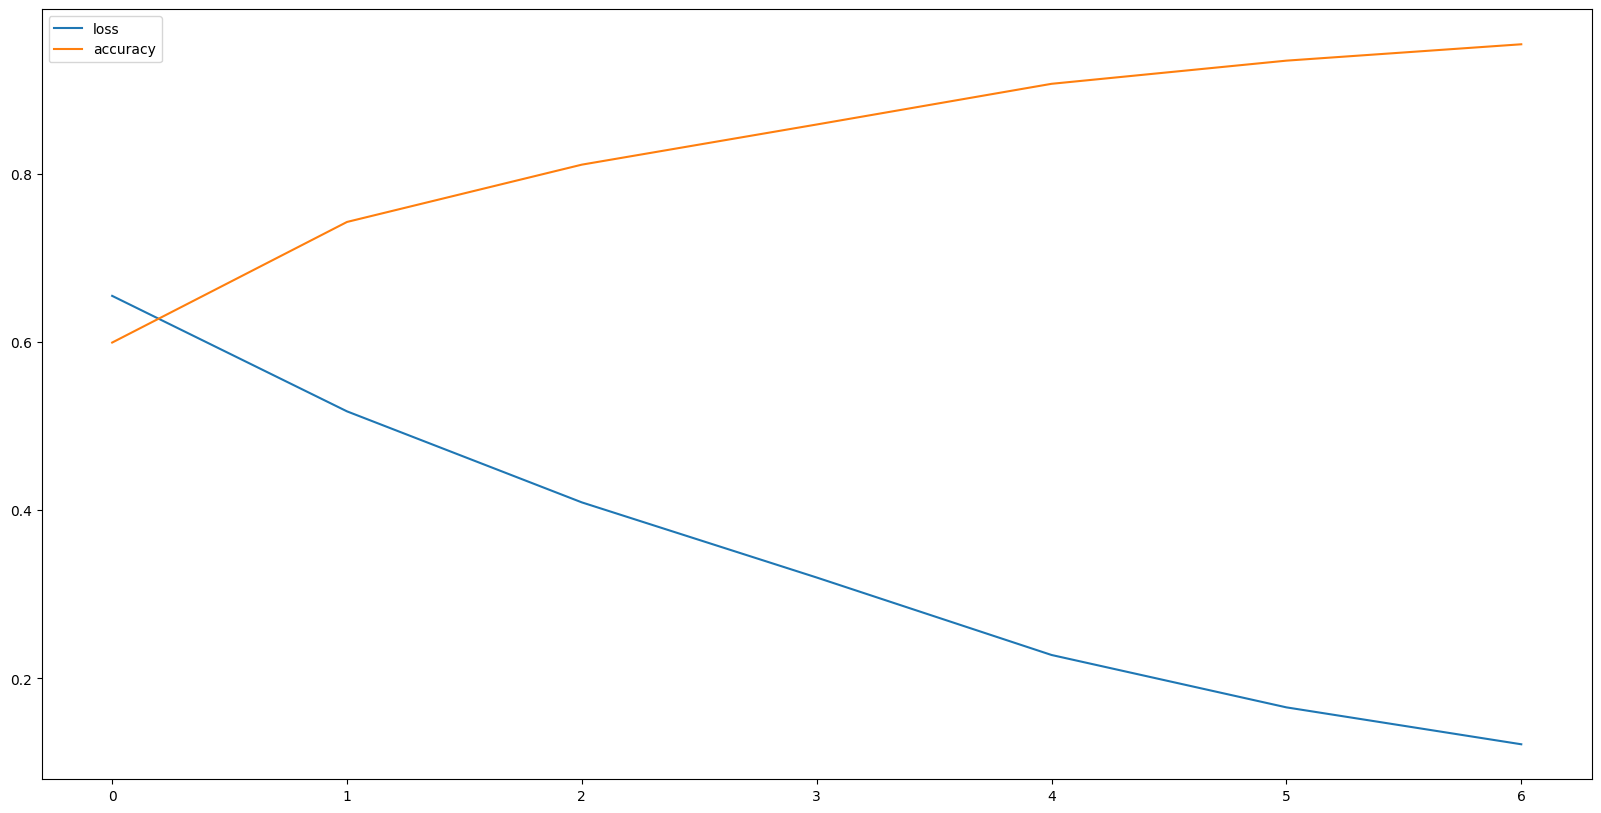

In [18]:
pd.DataFrame(history1.history).plot(figsize=(20,10))
plt.show()

# **This graph displays the loss and accuracy of the model done with the augmentation.**

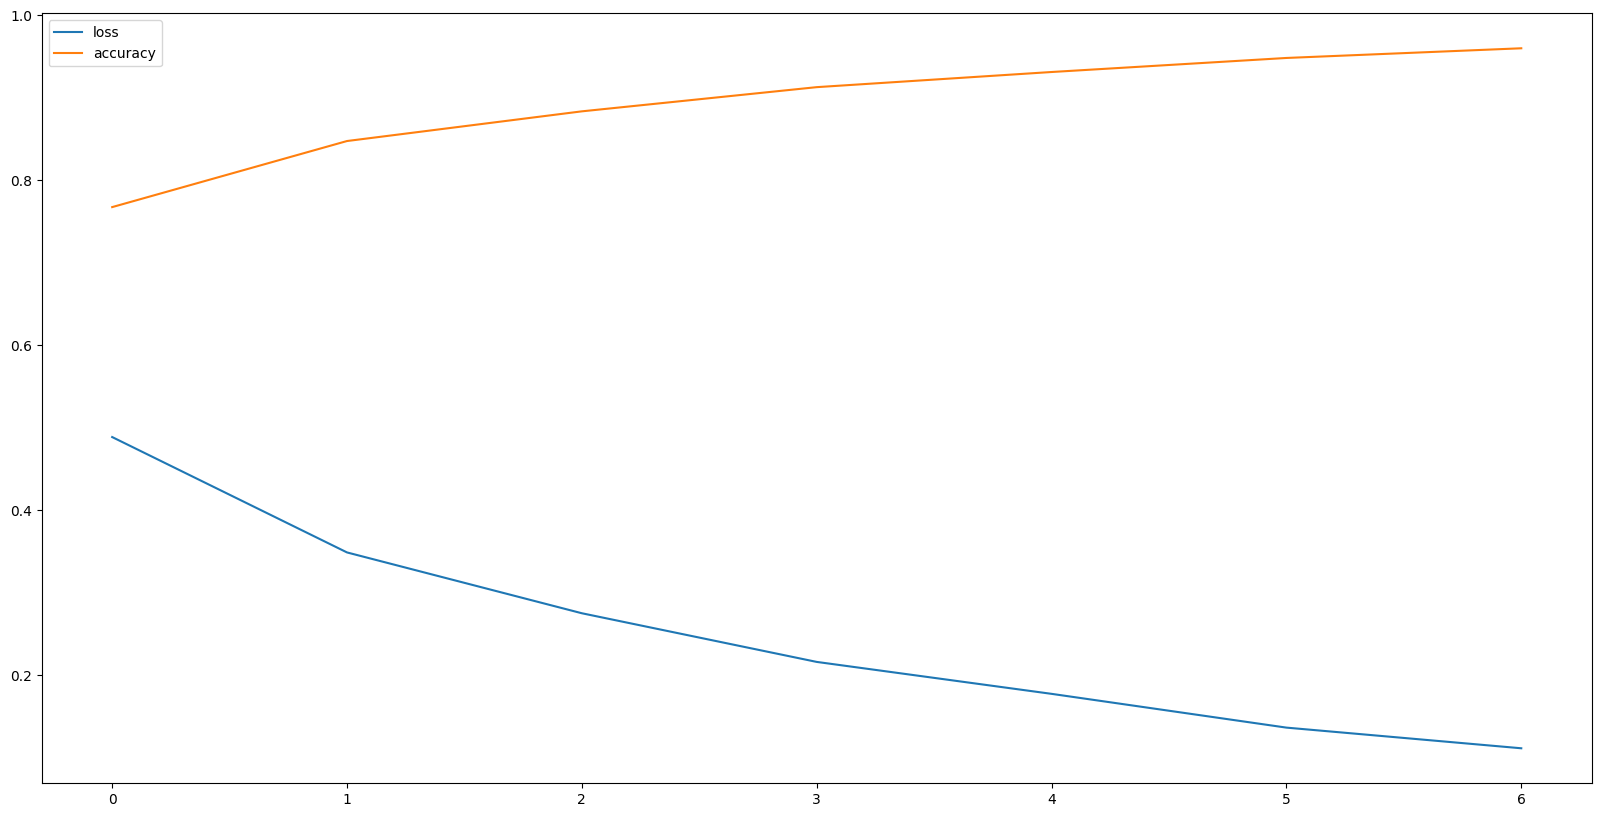

In [19]:
pd.DataFrame(history2.history).plot(figsize=(20,10))
plt.show()

# **Accuracy of both without and with the augmentation of images is compared**

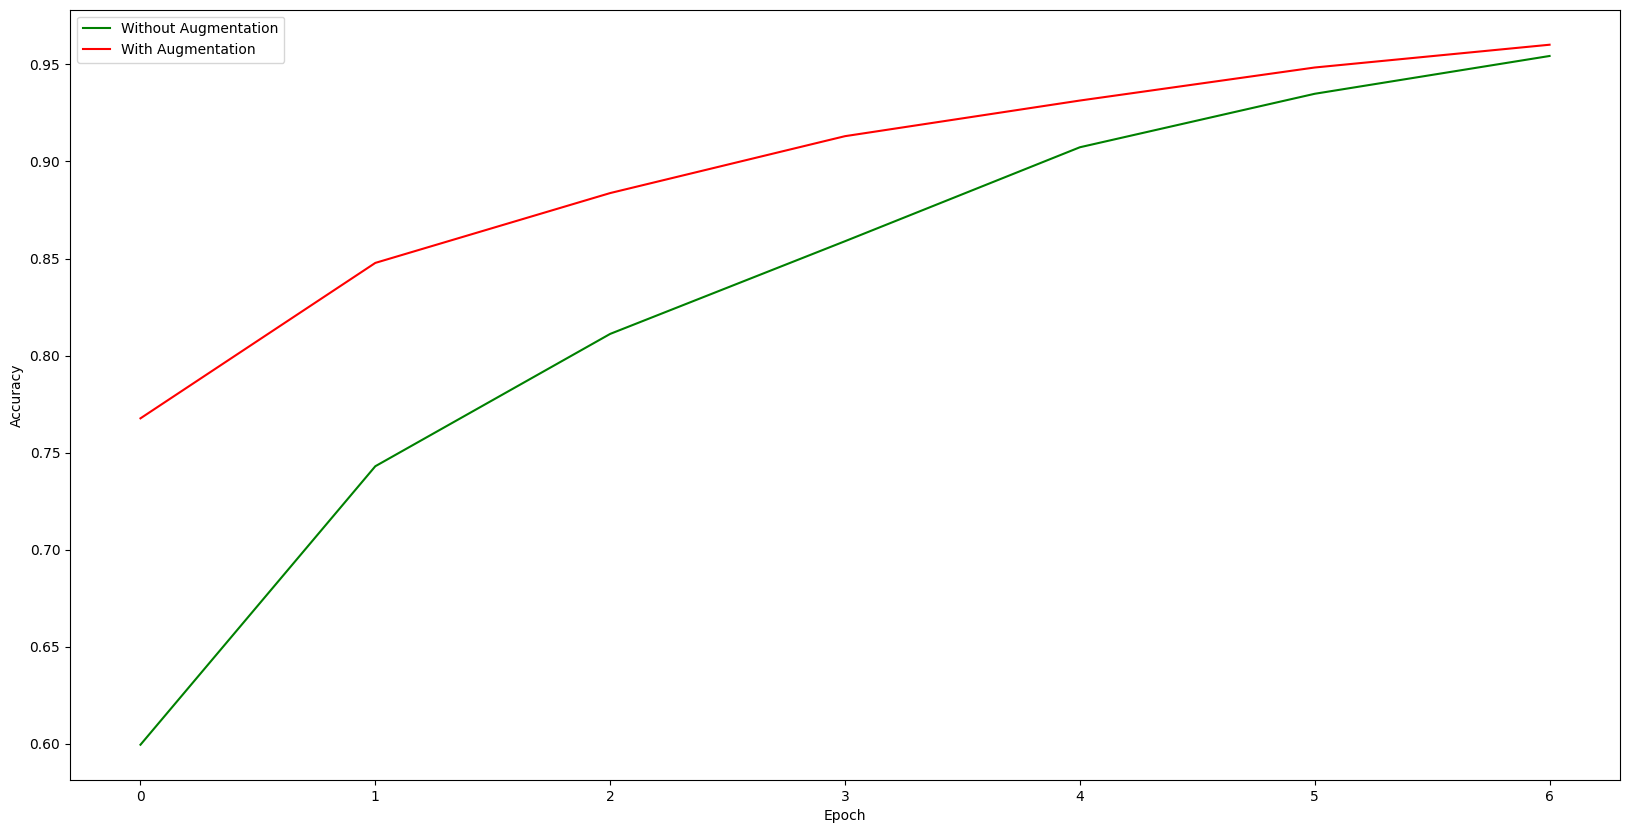

In [20]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.plot(history1.history['accuracy'],color='g')# g stands for green color
plt.plot(history2.history['accuracy'],color='r')# r stands for red color
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Without Augmentation','With Augmentation'],loc='upper left')
plt.show()

# **Loss of both without and with the augmentation of images is compared**

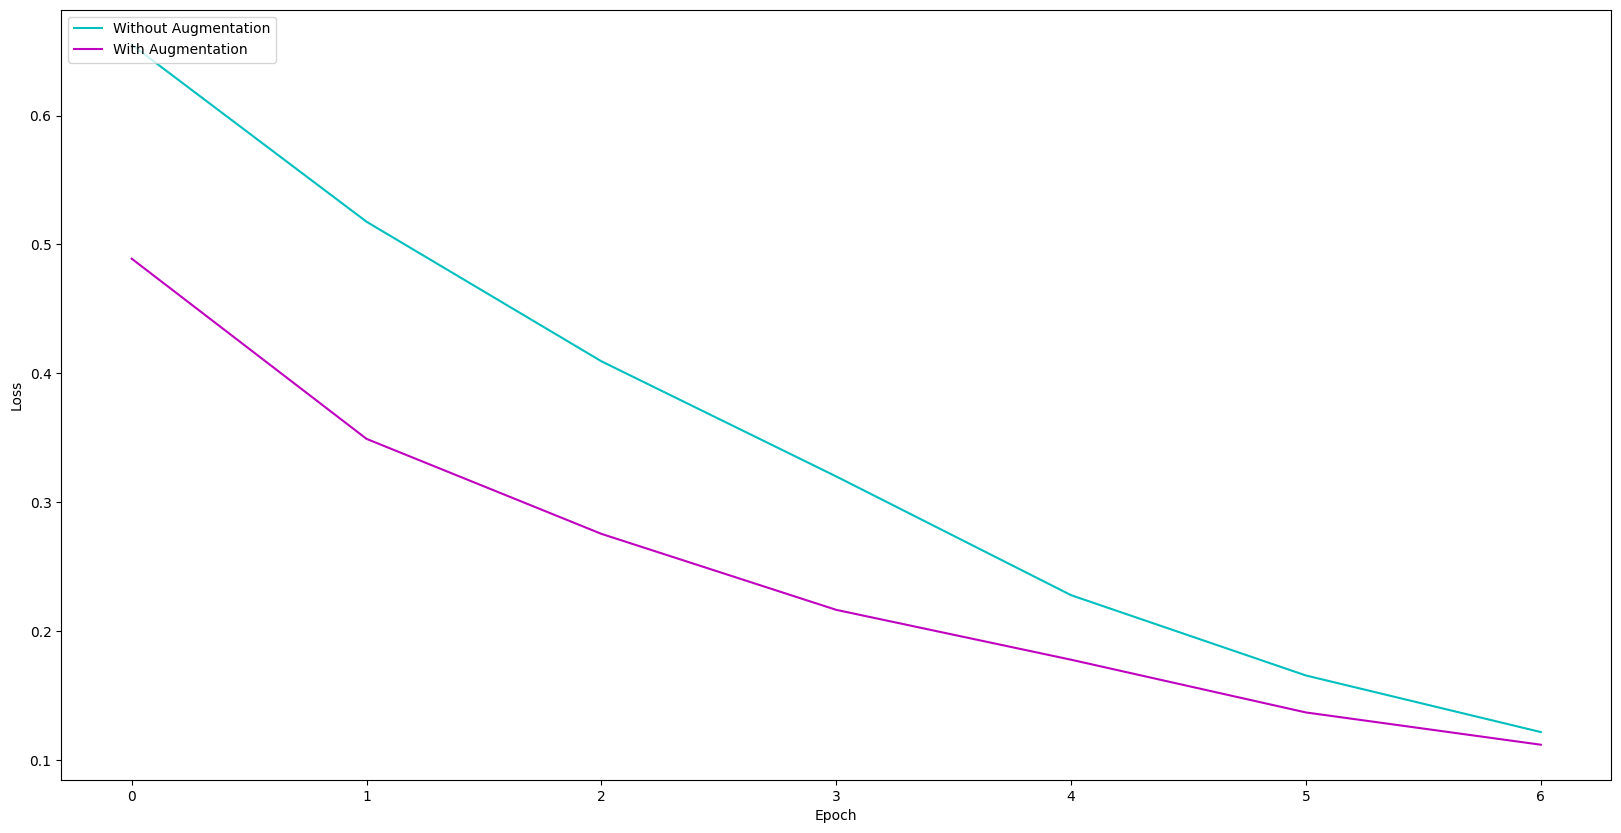

In [21]:
plt.plot(history1.history['loss'],color='c')# c stands for cyan color
plt.plot(history2.history['loss'],color='m')# m stands for magenta
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Without Augmentation','With Augmentation'],loc='upper left')
plt.show()

# **Grayscale Images accuracy and loss graph**

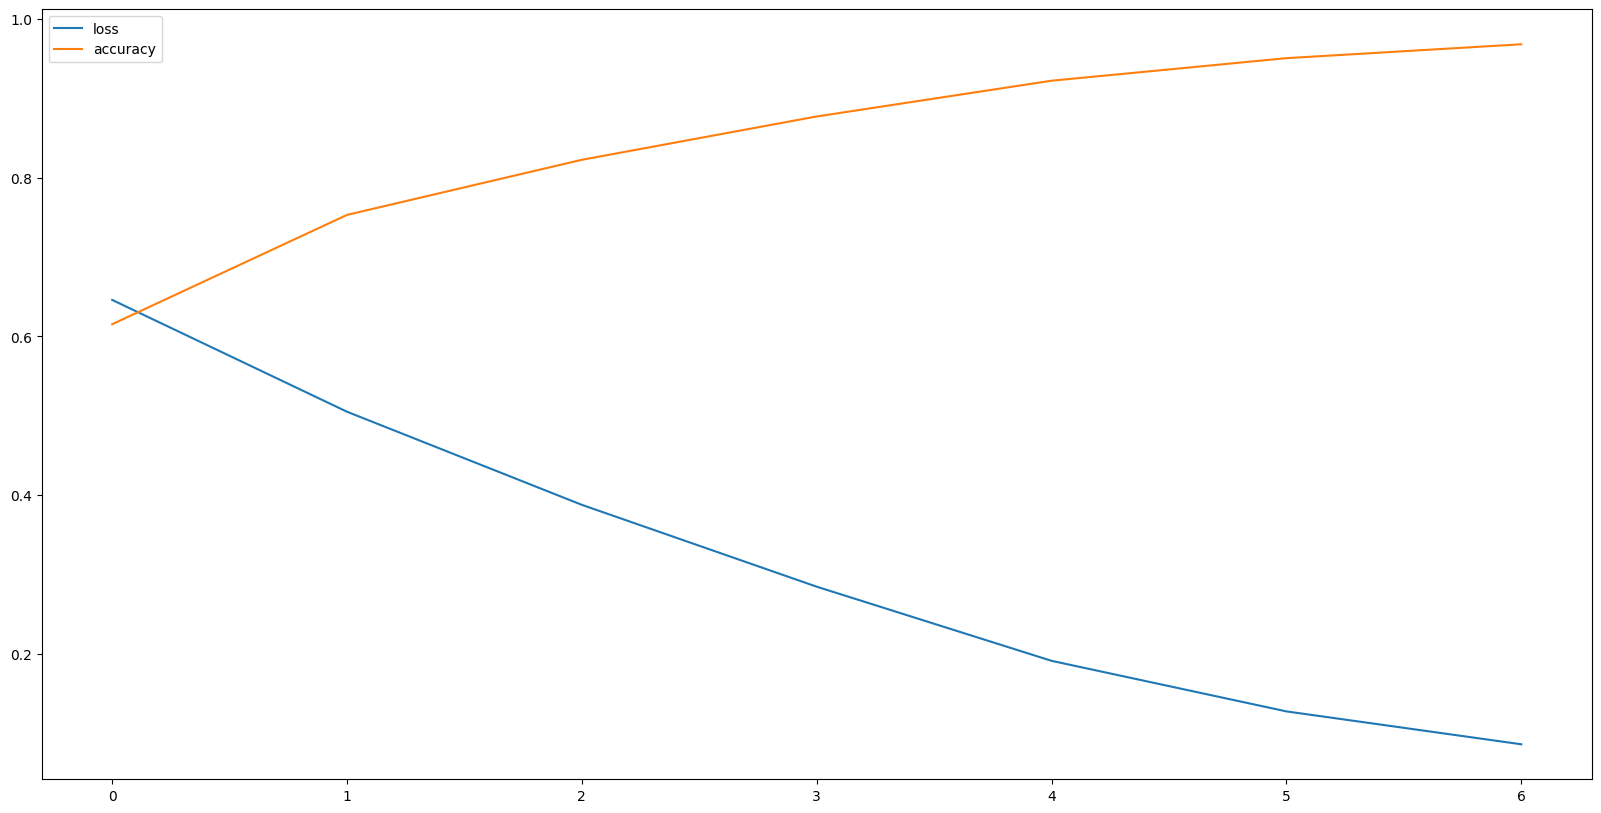

In [22]:
pd.DataFrame(history3.history).plot(figsize=(20,10))
plt.show()